### Importing necessary libraries

In [1]:
import pandas as pd
import json

### Reading json dataset

In [2]:
with open('loan_data_json.json') as json_file:
    data = json.load(json_file)

### Transforming json file into dataframe

In [4]:
df = pd.DataFrame(data)

In [5]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [7]:
df['purpose'].unique()

array(['debt_consolidation', 'credit_card', 'all_other',
       'home_improvement', 'small_business', 'major_purchase',
       'educational'], dtype=object)

In [8]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


### To extract annual income from log.annual.inc

In [9]:
import numpy as np

In [10]:
income = np.exp(df['log.annual.inc'])

In [11]:
df['annual_income'] = income

In [12]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,annual_income
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,85000.000385
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,65000.000073
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,31999.999943
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,85000.000385
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,80799.999636


### Categorizing fico scores

In [14]:
length = len(df)
length

9578

In [22]:
category_list = []
for x in range(0,length):
    score = df['fico'][x]
    try:
        if score >= 300 and score < 400:
            category = 'Very Poor'
        elif score >= 400 and score < 600:
            category = 'Poor'
        elif score >= 600 and score < 660:
            category = 'Fair'        
        elif score >= 660 and score < 700:
            category = 'Good'
        elif score >= 700:
            category = 'Excellent'
        else:
            category = 'Unknown'
    except:
        category = 'Unknown'
    category_list.append(category)    

### List into Pandas series and appending into main dataframe

In [23]:
categories = pd.Series(category_list)
df['fico_category'] = categories

In [24]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,annual_income,fico_category
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,85000.000385,Excellent
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,65000.000073,Excellent
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,31999.999943,Good
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,85000.000385,Excellent
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,80799.999636,Good


### Catgorizing interest rates using loc() function

In [25]:
df.loc[df['int.rate'] > 0.12, 'int.rate.category'] = 'High'
df.loc[df['int.rate'] <= 0.12, 'int.rate.category'] = 'Low'

In [26]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,annual_income,fico_category,int.rate.category
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,85000.000385,Excellent,Low
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,65000.000073,Excellent,Low
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,31999.999943,Good,High
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,85000.000385,Excellent,Low
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,80799.999636,Good,High


### Plotting Charts to visualize the borrowers count

In [30]:
fico_count = df.groupby(['fico_category']).size()
purpose_count = df.groupby(['purpose']).size()

In [31]:
fico_count

fico_category
Excellent    5357
Fair          489
Good         3732
dtype: int64

In [32]:
purpose_count

purpose
all_other             2331
credit_card           1262
debt_consolidation    3957
educational            343
home_improvement       629
major_purchase         437
small_business         619
dtype: int64

In [33]:
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(close=None, block=None)>

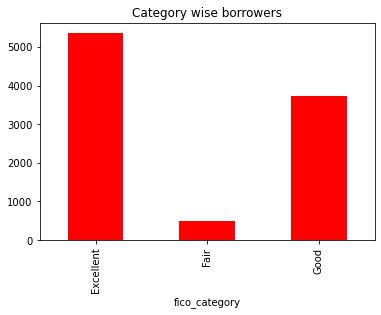

In [42]:
fico_count.plot.bar(title='Category wise borrowers',color='Red')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

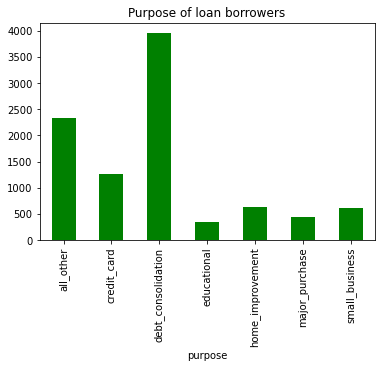

In [45]:
purpose_count.plot.bar(title='Purpose of loan borrowers',color='Green')
plt.show

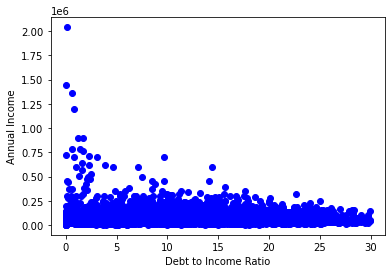

In [51]:
plt.scatter(df['dti'],df['annual_income'],color='Blue')
plt.xlabel('Debt to Income Ratio')
plt.ylabel('Annual Income')
plt.show()

### Saving cleaned file in new csv

In [52]:
df.to_csv('loan_analysis_cleaned.csv',index='True')